# Sales Analysis

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

In [2]:
path = "data/sales"
files = [file for file in os.listdir(path) if not file.startswith('.')] # Ignore hidden files

dataset = pd.DataFrame()

for file in files:
    current_data = pd.read_csv(f"{path}/{file}")
    dataset = pd.concat([dataset, current_data])
    
dataset.to_csv("data/sales/dataset.csv", index=False)
dataset = pd.read_csv("data/sales/dataset.csv")
dataset.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Cleaning

In [3]:
dataset.isna().head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,False,False,False,False,False,False
1,True,True,True,True,True,True
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False


In [4]:
dataset.isna().any(axis=1).head()

0    False
1     True
2    False
3    False
4    False
dtype: bool

In [5]:
# Find NAN
nan_df = dataset[dataset.isna().any(axis=1)]
display(nan_df.head())

dataset = dataset.dropna(how='all')
dataset.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


##### Get rid of text in order date column

In [6]:
dataset = dataset[dataset['Order Date'].str[0:2]!='Or']
dataset.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#### Make columns correct type

In [7]:
dataset['Quantity Ordered'] = pd.to_numeric(dataset['Quantity Ordered'])
dataset['Price Each'] = pd.to_numeric(dataset['Price Each'])

#### Add month column

In [8]:
dataset['Month'] = pd.to_datetime(dataset['Order Date']).dt.month
dataset.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### Add city column

In [9]:
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

dataset['City'] = dataset['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
dataset.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA)


## EDA

#### Question 1: What was the best month for sales? How much was earned that month? 

In [10]:
dataset['Sales'] = dataset['Quantity Ordered'].astype('int') * dataset['Price Each'].astype('float')
dataset.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX),23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA),99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99


#### What product sold the most?

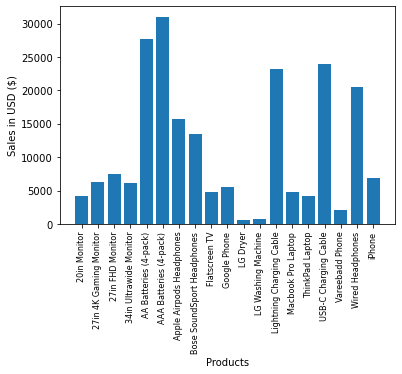

In [11]:
product_group = dataset.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

keys = [product for product, df in dataset.groupby(['Product'])]

plt.bar(keys,dataset.groupby(['Product']).sum()['Quantity Ordered'])
plt.ylabel('Sales in USD ($)')
plt.xlabel('Products')
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

In [12]:
dataset.groupby(['Month']).sum()

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


range(1, 13)


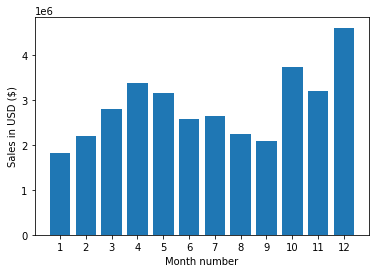

In [13]:
months = range(1,13)
print(months)

plt.bar(months,dataset.groupby(['Month']).sum()['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()


#### Question 2: What city sold the most product?

In [14]:
dataset.groupby(['City']).sum()

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2779908.20,104794,2795498.58
Austin (TX),11153,1809873.61,69829,1819581.75
Boston (MA),22528,3637409.77,141112,3661642.01
Dallas (TX),16730,2752627.82,104620,2767975.40
Los Angeles (CA),33289,5421435.23,208325,5452570.80
New York City (NY),27932,4635370.83,175741,4664317.43
Portland (ME),2750,447189.25,17144,449758.27
Portland (OR),11303,1860558.22,70621,1870732.34
San Francisco (CA),50239,8211461.74,315520,8262203.91


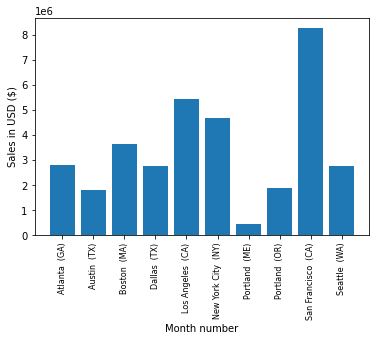

In [15]:
keys = [city for city, df in dataset.groupby(['City'])]

plt.bar(keys,dataset.groupby(['City']).sum()['Sales'])
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

#### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [16]:
# Add hour column
dataset['Hour'] = pd.to_datetime(dataset['Order Date']).dt.hour
dataset['Minute'] = pd.to_datetime(dataset['Order Date']).dt.minute
dataset['Count'] = 1
dataset.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX),23.90,8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA),99.99,22,30,1
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),600.00,14,38,1
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99,14,38,1
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99,9,27,1


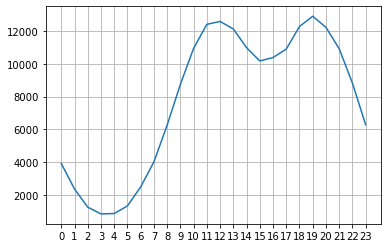

In [17]:
keys = [pair for pair, df in dataset.groupby(['Hour'])]

plt.plot(keys, dataset.groupby(['Hour']).count()['Count'])
plt.xticks(keys)
plt.grid()
plt.show()



#### Question 4: What products are most often sold together?

In [23]:
df = dataset[dataset['Order ID'].duplicated(keep=False)]
df_copy = df.copy()
mask = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
for i, item in mask.iteritems():
    df_copy.loc[i, 'Grouped'] = item

df2 = df_copy[['Order ID', 'Grouped']].drop_duplicates()
df2.head()

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [24]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)


('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


/tmp/ipykernel_76/2812367272.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(keys, fontdict = {'rotation':'vertical', 'size':8})


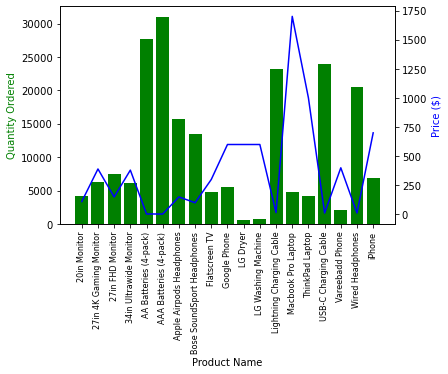

In [25]:
product_group = dataset.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']
keys = [pair for pair, df in product_group]

prices = dataset.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='g')
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')

ax1.set_xticklabels(keys, fontdict = {'rotation':'vertical', 'size':8})
fig.show()